<a href="https://colab.research.google.com/github/tl614-rutgers/gisTest/blob/main/ps0_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our code :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [1]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()

### geopandas
https://geopandas.org/

a sister of pandas; does the job; tho not as fancy-interactive as folium or leafmap

just quick focus here on thematic/choloropleth maps: coloring polygons (states, counties, etc) with values of a var, say crime: green=low, red=hi

REFS (also good for self study):

https://geopandas.org/en/stable/gallery/choropleths.html

https://geopandas.org/en/stable/gallery/choro_legends.html

https://geopandas.org/en/stable/gallery/geopandas_rasterio_sample.html

In [2]:
!pip install geopandas
!pip install mapclassify
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.0 MB/s eta 0:00:00


## mapping your area of interest

say you are interested in NJ counties, so just google that geography + "shapefile", i.e., "NJ counties shapefile"

In [3]:
#i found one and reposted on my website, download it onto colab:
! wget -q -O States_shapefile.zip https://docs.google.com/uc?id=1Kb-1ZyUSkY0gjHC7wuQR9cWE4sXjd4sC&export=download

zip_ref = zipfile.ZipFile('States_shapefile.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
usmap=gpd.read_file('States_shapefile.shp') #load the shapefile with gpd as njC

<Axes: >

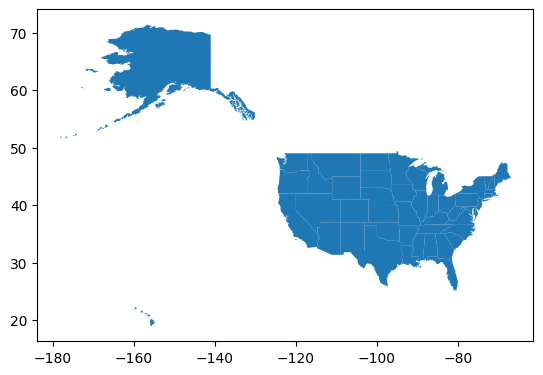

In [4]:
#make the map
usmap.plot()

## mapping var from data file

In [5]:
# say want to map housing values across nj counties; first need to get the map with counties
# (then we will get regular data with housing values and merge with counties data and color code the polygons)
# maps have their own files, a popular one is 'shapefile', so if you want to map nj counties
# first step is to get the geo data so google 'geography you're looking for + 'shapefile'', eg 'nj counties shapefile'
# i found one and put on my website
# have it zipped--one shapefile consists of several files--keep them in one zipped folder and dont change their names
! wget -q -O States_shapefile.zip https://docs.google.com/uc?id=1Kb-1ZyUSkY0gjHC7wuQR9cWE4sXjd4sC&export=download
zip_ref = zipfile.ZipFile('States_shapefile.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
uscounty=gpd.read_file('States_shapefile.shp') #load the shapefile with gpd as njC

In [6]:
usmap.dtypes #with geopandas can do stuff like with pandas :)

FID              int64
Program         object
State_Code      object
State_Name      object
Flowing_St      object
FID_1            int64
geometry      geometry
dtype: object

<Axes: >

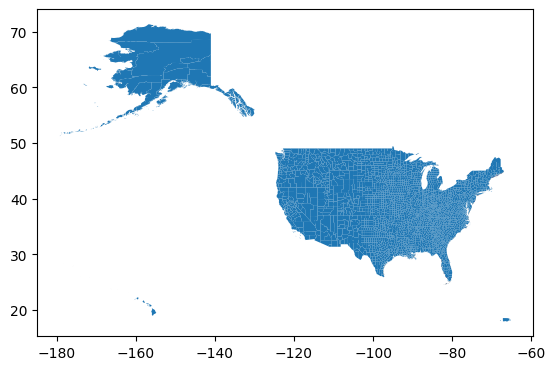

In [ ]:
uscounty.plot() #yay love the shape

In [7]:
usmap.head(5)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,NaN,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."
3,4,PDS,AR,ARKANSAS,F,922,"POLYGON ((-94.46169 34.19677, -94.45262 34.508..."
4,5,NaN,CA,CALIFORNIA,N,923,"MULTIPOLYGON (((-121.66522 38.16929, -121.7823..."


<Axes: >

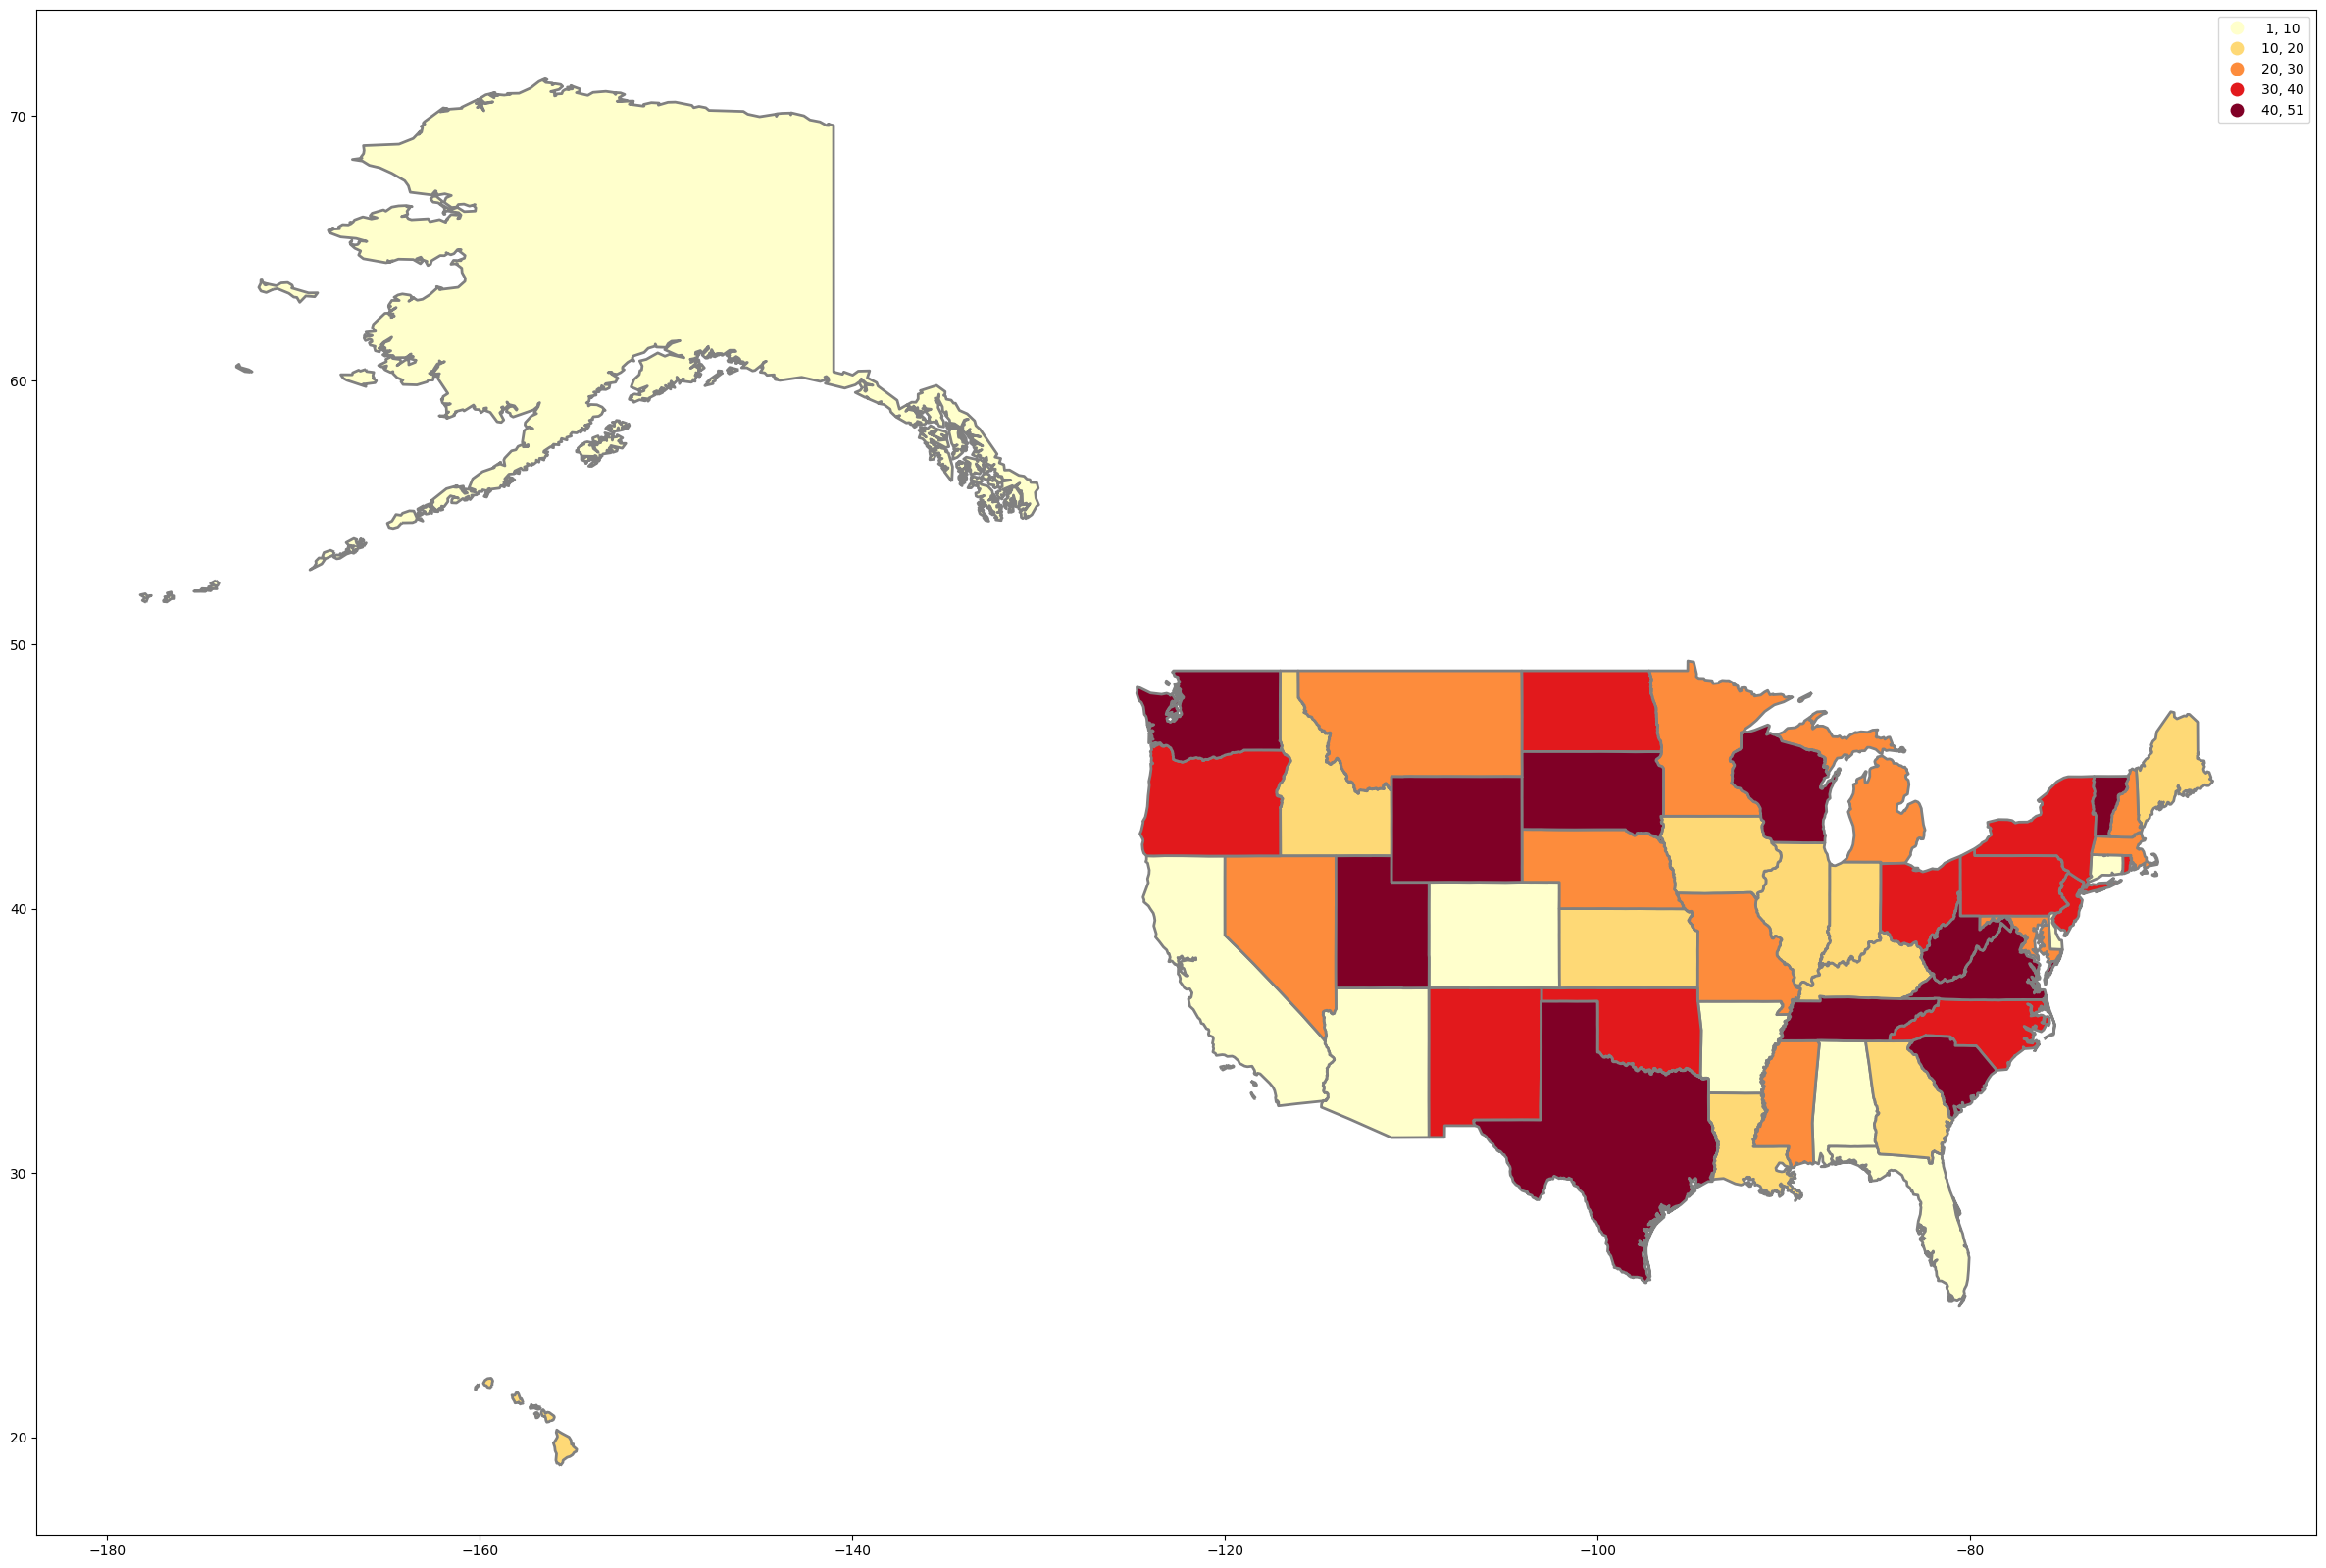

In [14]:
#sometimes lucky and have the variable we want to map in the shapefile
usmap.plot(figsize=(30,36),column='FID',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=2,legend_kwds= {"fmt": "{:,.0f}"}) #,ax=ax

<Axes: >

<Axes: >

[]

[]

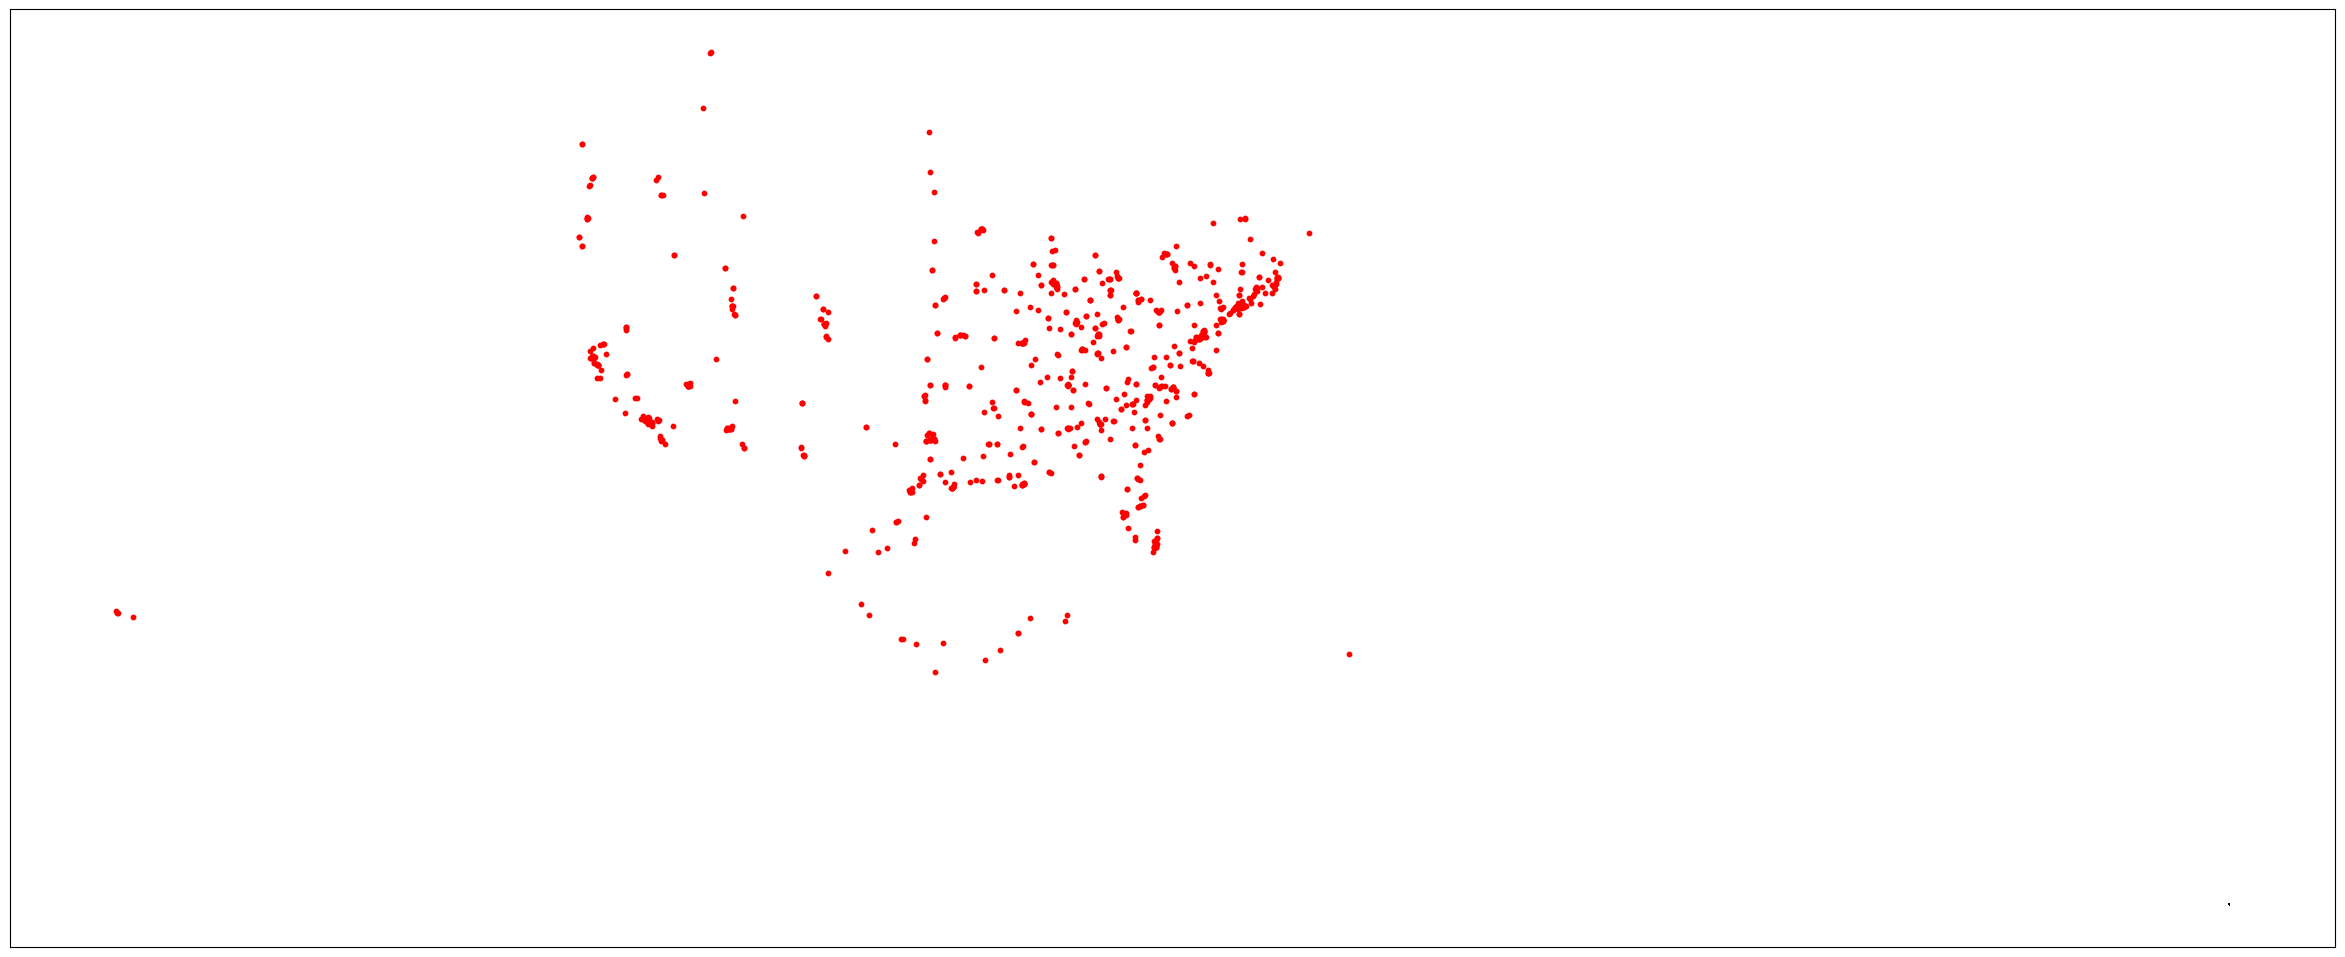

In [19]:
# we can overlay layers; lets get nj uni shapefile on it
!wget -q -O Major_Sport_Venues.zip  https://docs.google.com/uc?id=12pFa77LGIYWKgDGp3f4-leLigPYIMteM&export=download
zip_ref = zipfile.ZipFile('Major_Sport_Venues.zip', 'r');zip_ref.extractall(); zip_ref.close()

venues = gpd.read_file('MajorSportVenues.shp')
#col.dtypes

fig, ax = plt.subplots(1, figsize=(30,50))
usmap.plot(ax=ax, color='white', edgecolor='black',linewidth=1)
venues.plot(ax=ax, marker='o', color='red', markersize=10)
#col.plot(column='ENROLL',markersize=50,legend=True,cmap='RdYlGn_r',scheme='QUANTILES',k=5,ax=ax)
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_title('Watersheds by area ($mi^2$)')